Proyek Analisis Data: E-Commerce Public Dataset

Nama: Aldi Pascagama Nurrachman
Email: pasca@student.uns.ac.id
ID Dicoding: dipasca

Menentukan Pertanyaan Bisnis

-Produk apa yang paling banyak diminati customer?

-wilayah mana yang paling banyak membeli produk?

-apa metode pembayaran yang paling banyak dipakai?

In [1]:
#Import Semua Packages/Library yang Digunakan

import pandas as pd
import streamlit as st
import matplotlib.pyplot as plt
import seaborn as sns 
from babel.numbers import format_currency
sns.set(style='dark')

In [2]:
#Data Wrangling

dfc = pd.read_csv('data/customers_dataset.csv').set_index('customer_zip_code_prefix').sort_index()
dfg = pd.read_csv('data/geolocation_dataset.csv').drop_duplicates(subset='geolocation_zip_code_prefix',keep='first').set_index('geolocation_zip_code_prefix').sort_index()
dfoi = pd.read_csv('data/order_items_dataset.csv').set_index('order_id').sort_index()
dfop = pd.read_csv('data/order_payments_dataset.csv').set_index('order_id').sort_index()
dfor = pd.read_csv('data/order_reviews_dataset.csv').set_index('order_id').sort_index()
dfo = pd.read_csv('data/orders_dataset.csv').set_index('order_id').sort_index()
dfpc = pd.read_csv('data/product_category_name_translation.csv')
dfp = pd.read_csv('data/products_dataset.csv',usecols=['product_id','product_category_name'])
dfs = pd.read_csv('data/sellers_dataset.csv').set_index('seller_zip_code_prefix').sort_index()

In [3]:
#Gathering Data

df_customer = dfc.join(dfg).reset_index(names='customer_zip_code')                              
df_seller = dfs.join(dfg).reset_index(names='seller_zip_code')
df_order = dfo.join(dfoi).join(dfop).join(dfor).reset_index(names='order_id')
df_product = pd.merge(left=dfp,right=dfpc,how="left",left_on="product_category_name",right_on='product_category_name')


In [4]:
df_order_product = pd.merge(left=df_order,right=df_product,how='left',left_on='product_id',right_on='product_id')
df_order_customer = pd.merge(left=df_order_product,right=df_customer,how='left',left_on='customer_id',right_on='customer_id')
df = pd.merge(left=df_order_customer,right=df_seller,how='left',left_on='seller_id',right_on='seller_id')

In [5]:
#Cleaning Data

df.dropna(inplace=True,subset=['price','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','review_id','product_category_name_english','payment_type','geolocation_city_x','geolocation_city_y'])

Exploratory Data Analysis (EDA)

In [6]:
#Explore Date

Visualization & Explanatory Analysis

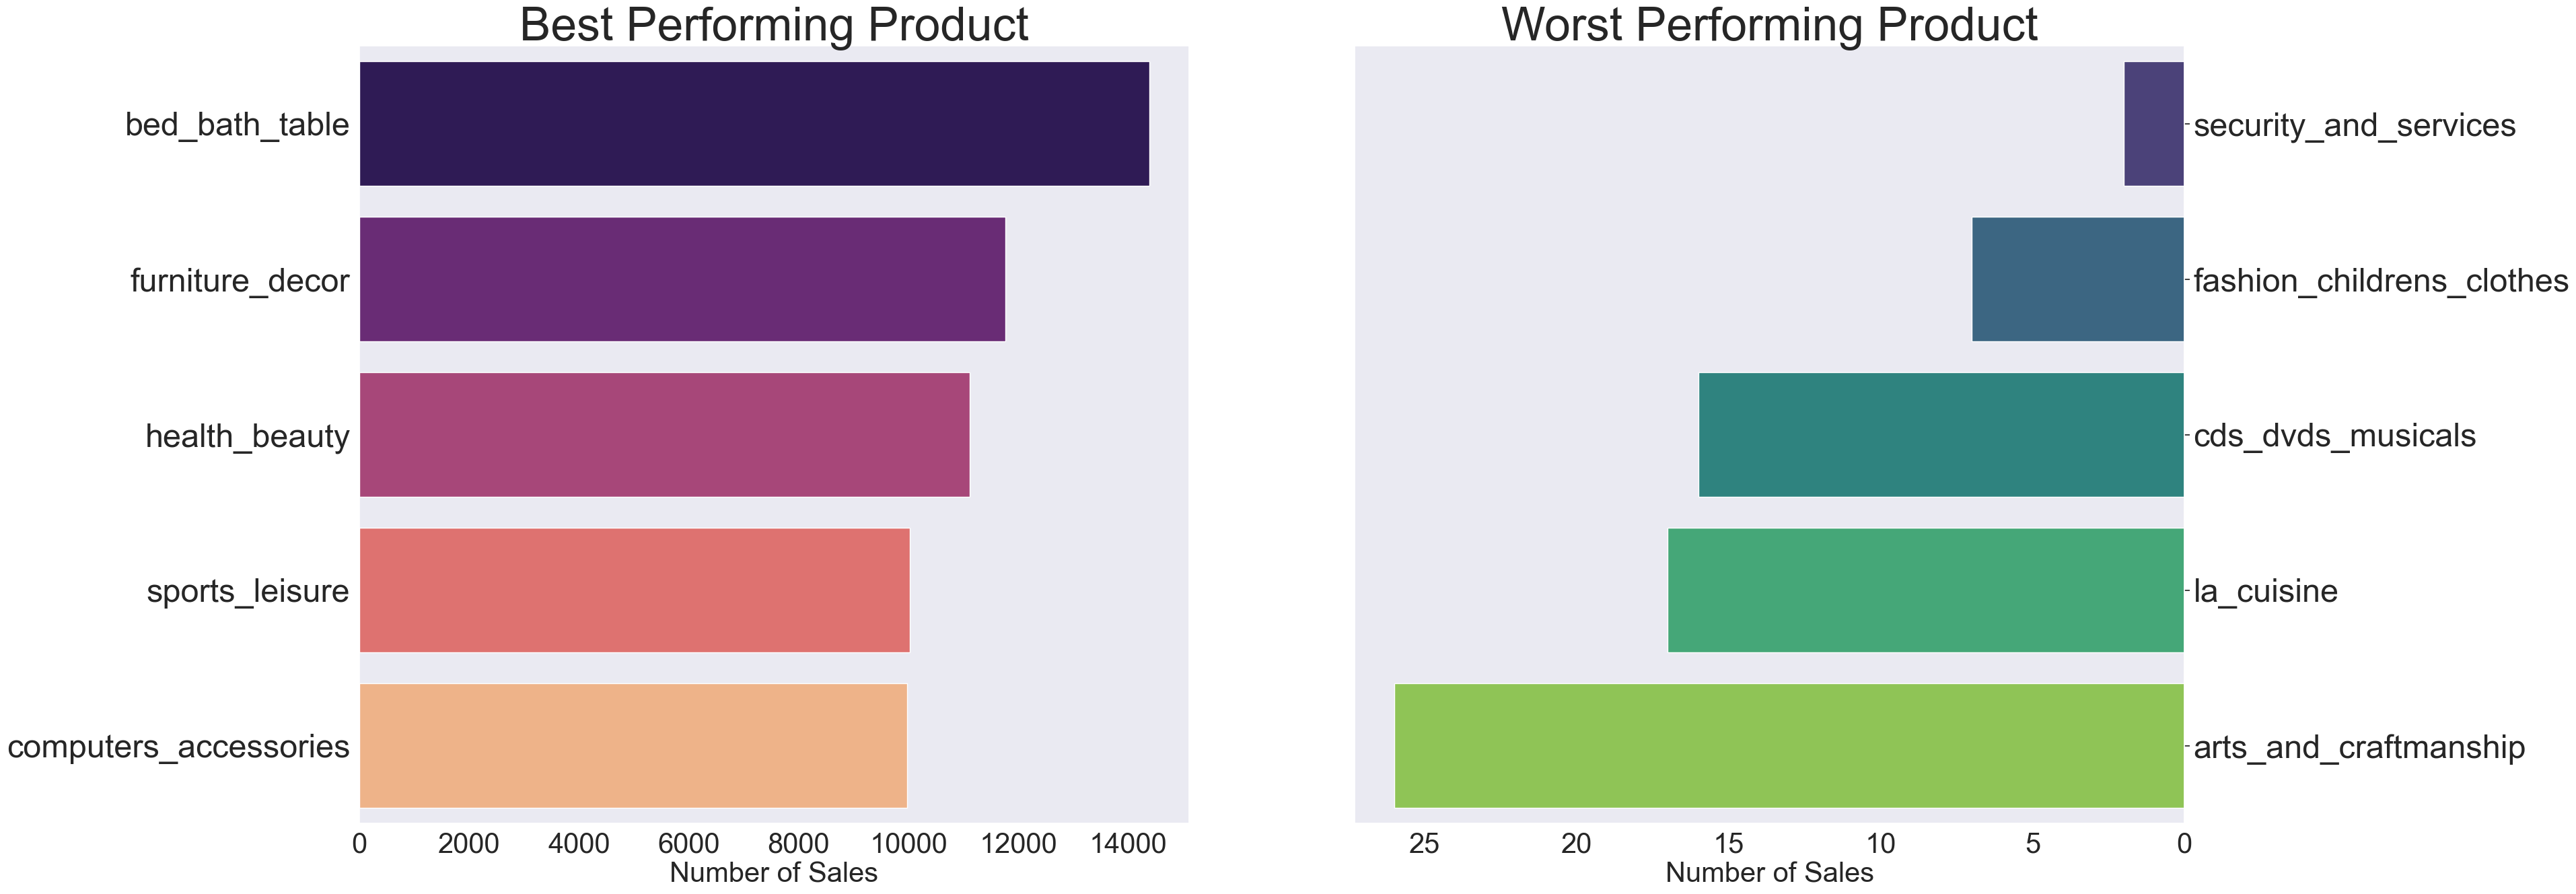

In [14]:
#Produk apa yang paling banyak diminati customer?

sum_order_items_df = df.groupby("product_category_name_english").order_item_id.sum().sort_values(ascending=False).reset_index()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(35, 15))

colors = ["#90CAF9", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="order_item_id", y="product_category_name_english", data=sum_order_items_df.head(5), palette='magma', ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel("Number of Sales", fontsize=30)
ax[0].set_title("Best Performing Product", loc="center", fontsize=50)
ax[0].tick_params(axis='y', labelsize=35)
ax[0].tick_params(axis='x', labelsize=30)

sns.barplot(x="order_item_id", y="product_category_name_english", data=sum_order_items_df.sort_values(by="order_item_id", ascending=True).head(5), palette='viridis', ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel("Number of Sales", fontsize=30)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Product", loc="center", fontsize=50)
ax[1].tick_params(axis='y', labelsize=35)
ax[1].tick_params(axis='x', labelsize=30)

<Axes: xlabel='customer_count', ylabel='geolocation_city_x'>

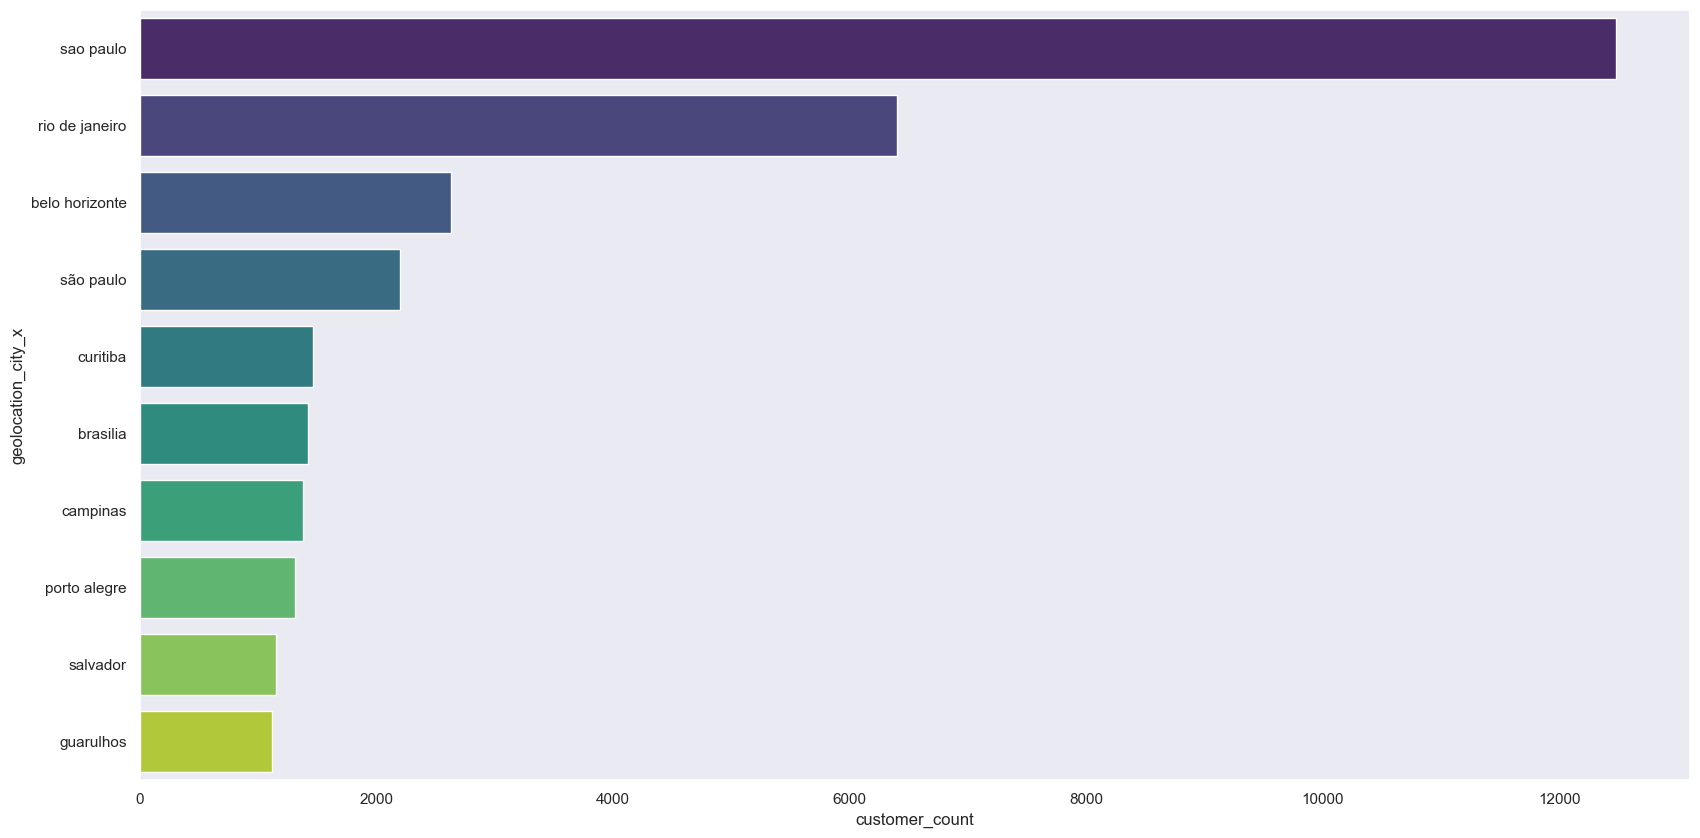

In [10]:
#Wilayah mana yang paling banyak membeli produk?

bycity_df = df.groupby(by="geolocation_city_x").customer_id.nunique().reset_index().sort_values(by="customer_id", ascending=False)[0:10]
bycity_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)

fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(
    x="customer_count", 
    y="geolocation_city_x",
    data=bycity_df.sort_values(by="customer_count", ascending=False),
    palette='viridis',
    ax=ax
)

<Axes: xlabel='payment_type', ylabel='customer_count'>

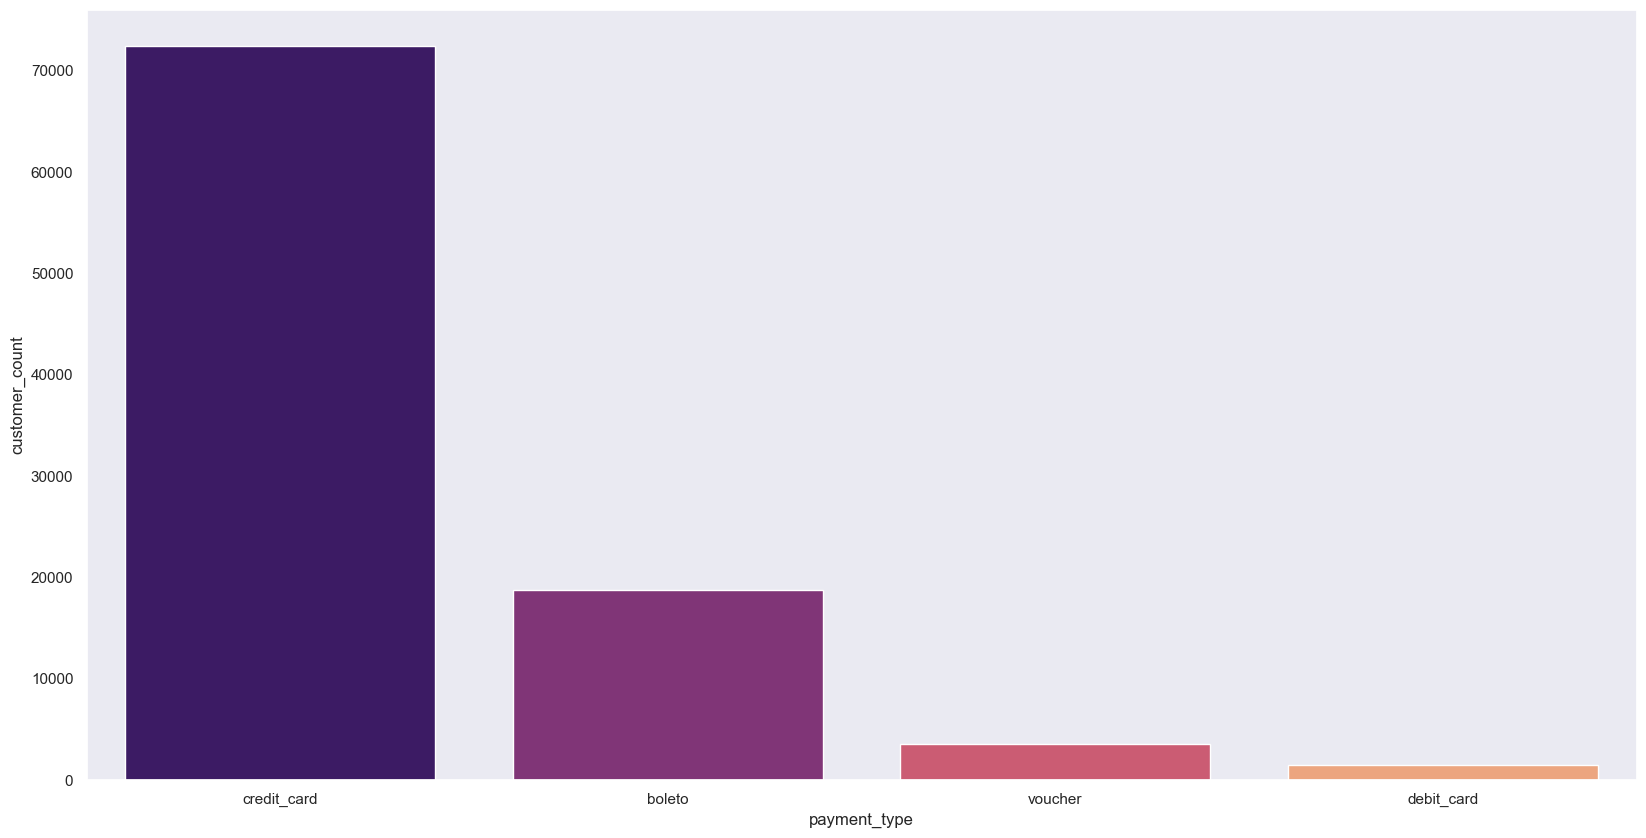

In [11]:
#Apa metode pembayaran yang paling banyak dipakai?

bypayment_df = df.groupby(by="payment_type").customer_id.nunique().reset_index()
bypayment_df.rename(columns={
        "customer_id": "customer_count"
    }, inplace=True)
fig, ax = plt.subplots(figsize=(20, 10))

sns.barplot(
    x="payment_type", 
    y="customer_count",
    data=bypayment_df.sort_values(by="customer_count", ascending=False)[0:4],
    palette='magma',
    ax=ax,
)

Conclusion

- Produk yang paling banyak diminati adalah Bed Bath Table

- Wilayah yang paling banyak membeli produk adalah San Paulo

- Metode pembayaran yang paling banyak dipakai adalah Credit Card